In [0]:
import numpy as np
import pandas as pd
import plotly.express as px

In [0]:
from tensorflow.keras.datasets import fashion_mnist

In [0]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
x_train.shape

(60000, 28, 28)

In [0]:
x_test.shape

(10000, 28, 28)

In [0]:
x_train[0]

In [0]:
px.imshow(x_train[0])

In [0]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [0]:
y_cat_train = pd.get_dummies(y_train)
y_cat_test = pd.get_dummies(y_test)

In [0]:
y_cat_test

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,1
9996,0,1,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,1,0
9998,0,1,0,0,0,0,0,0,0,0


In [0]:
x_train.max()

1.0

In [0]:
x_train = x_train/255

In [0]:
x_test = x_test/255

In [0]:
x_train = x_train.reshape(60000,28,28,1)

In [0]:
x_test = x_test.reshape(10000,28,28,1)

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

In [0]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size=(4,4),input_shape=(28,28,1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 32, kernel_size=(4,4),input_shape=(28,28,1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 9, 9, 32)          16416     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [0]:
from tensorflow.keras.callbacks import EarlyStopping

In [0]:
early_stop = EarlyStopping(monitor='val_loss', patience=1)

In [0]:
model.fit(x_train, y_cat_train, epochs=10, validation_data=(x_test, y_cat_test), callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.5083 - accuracy: 0.8142 - val_loss: 0.3996 - val_accuracy: 0.8522
Epoch 2/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.3371 - accuracy: 0.8753 - val_loss: 0.3538 - val_accuracy: 0.8710
Epoch 3/10
1875/1875 [==============================] - 46s 25ms/step - loss: 0.2894 - accuracy: 0.8920 - val_loss: 0.3430 - val_accuracy: 0.8717
Epoch 4/10
1875/1875 [==============================] - 46s 25ms/step - loss: 0.2611 - accuracy: 0.9028 - val_loss: 0.3069 - val_accuracy: 0.8898
Epoch 5/10
1875/1875 [==============================] - 46s 25ms/step - loss: 0.2364 - accuracy: 0.9111 - val_loss: 0.2871 - val_accuracy: 0.8954
Epoch 6/10
1875/1875 [==============================] - 46s 25ms/step - loss: 0.2171 - accuracy: 0.9185 - val_loss: 0.2885 - val_accuracy: 0.8967


In [0]:
losses = pd.DataFrame(model.history.history)
losses

,loss,accuracy,val_loss,val_accuracy
0,0.508277,0.814217,0.399608,0.8522
1,0.337123,0.875267,0.353793,0.8710
2,0.289449,0.891967,0.342994,0.8717
3,0.261064,0.902750,0.306880,0.8898
4,0.236410,0.911083,0.287105,0.8954
5,0.217076,0.918483,0.288526,0.8967


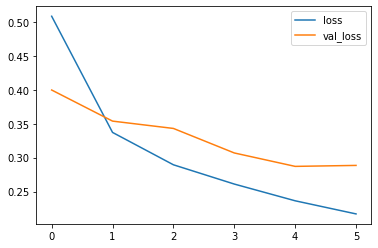

In [0]:
losses[['loss', 'val_loss']].plot()

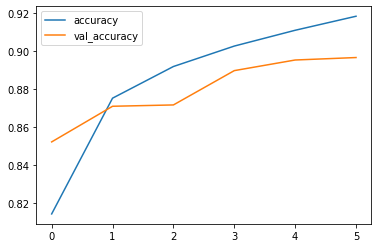

In [0]:
losses[['accuracy', 'val_accuracy']].plot()

In [0]:
model.save('./fashion')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: ./fashion/assets


In [0]:
y_pred = model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [0]:
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [0]:
from sklearn.metrics import classification_report, confusion_matrix

In [0]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.92      0.83      1000
           1       0.98      0.98      0.98      1000
           2       0.82      0.87      0.85      1000
           3       0.91      0.90      0.91      1000
           4       0.83      0.86      0.85      1000
           5       0.97      0.98      0.97      1000
           6       0.81      0.58      0.67      1000
           7       0.94      0.97      0.95      1000
           8       0.98      0.97      0.98      1000
           9       0.98      0.94      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.89     10000
weighted avg       0.90      0.90      0.89     10000



In [0]:
confusion_matrix(y_test, y_pred)

array([[923,   1,  20,  12,   2,   2,  36,   0,   4,   0],
       [  5, 976,   1,  12,   2,   1,   1,   0,   2,   0],
       [ 27,   0, 868,  10,  58,   0,  36,   0,   1,   0],
       [ 39,  16,  11, 898,  14,   0,  20,   0,   2,   0],
       [  6,   1,  55,  35, 859,   0,  42,   0,   2,   0],
       [  0,   0,   0,   0,   0, 983,   0,  14,   0,   3],
       [210,   2,  94,  15,  93,   0, 578,   0,   8,   0],
       [  0,   0,   0,   0,   0,  19,   0, 969,   0,  12],
       [  9,   1,   5,   2,   3,   2,   2,   4, 972,   0],
       [  1,   0,   0,   0,   0,  11,   0,  47,   0, 941]])